In [ ]:
# Avance del proyecto 

In [12]:
import numpy as np
import pandas as pd
import network as nx
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl

In [36]:
ensayo3_excel= r"C:\Users\V304-18\Documents\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4_excel=r"C:\Users\V304-18\Documents\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_04.xlsx"
coordenadas_cvs= r"C:\Users\V304-18\Documents\GitHub\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"

ensayo3_dict=pd.read_excel(ensayo3_excel, sheet_name=None, index_col=0)
ensayo4_dict=pd.read_excel(ensayo4_excel, sheet_name=None, index_col=0)

In [35]:
ensayo3_dict.keys()

ensayos_dfs=[]
for sujeto in ensayo3_dict.keys():
    ensayos_dfs.append(ensayo3_dict[sujeto])

In [38]:
#Filtrado de matrices 
threshold=0.5
porcentaje=0.6

stack= np.stack([df.values for df in ensayos_dfs]) 
above= stack>threshold

N= len (ensayos_dfs) #109
count_above =above.sum(axis= 0)  #contando cuantos valores superan el umbral en celda

min_requerido=int(np.ceil(porcentaje*N)) #0.6*109=65.4
# con eesto bastara con quedarnos ocn las celdas de 'above´que cumplan con min_requerido 
#para si tener el numero de sujetos que superan el umbral 
result_bool = count_above>=min_requerido
result_df =pd.DataFrame(result_bool,
                      index=ensayos_dfs[0].index,
                      columns=ensayos_dfs[0].columns).astype(int) 

<Axes: >

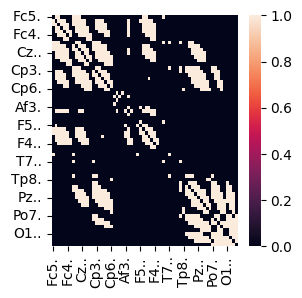

In [39]:
plt.figure(figsize=(3,3))
sns.heatmap(result_df)

In [ ]:
stack.shape

In [ ]:
# Generar estadistico para decidir umbrales 

C:\Users\V304-18\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\V304-18\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\V304-18\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both 

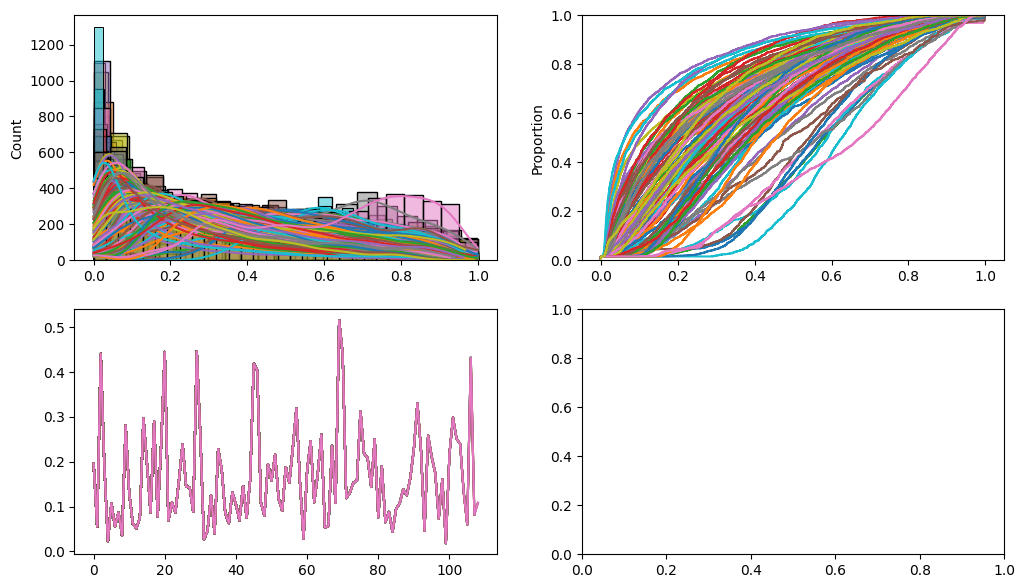

In [53]:
ensayos_dfs

th25, th50, th75, promedio, varianza = [],[],[],[],[]
fig, axes= plt.subplots(2,2, figsize = (12,7))

for sujeto in ensayos_dfs:
    #calculos de estadisticos
    th25.append(np.percentile(sujeto,25))
    th50.append(np.percentile(sujeto,50))
    th75.append(np.percentile(sujeto,75))
    promedio.append(np.mean(sujeto))
    varianza.append(np.std(sujeto))

    #plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values,ax=axes[0][1])
    axes[1][0].plot(th25, label='percentil al 25%')
    axes[1][0].plot(th25, label='percentil al 50%')
    axes[1][0].plot(th25, label='percentil al 75%')
    axes[1][0].legend